In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import ptutils.Evaluation as ev

%matplotlib inline

os.chdir('/nfshome/linse/Documents/development/pytorch_classification/projects/CIFAR10Demo/scripts')
RESULTPATH = "../results"

#wether plots are saved or not
SAVE_RESULTS = True
SAVE_EXTENSION = "pdf"

#plt.ioff()
plt.ion()

# Use LaTeX text interpretation in figures
plt.rcParams.update({
    "text.usetex": True})

pd.options.display.max_colwidth = 80

# Plot Training History

In [2]:
def plot_training_history(log_paths, excluded):
    filenames_train = [os.path.join(log_path, 'trainstatistics.dat') for log_path in log_paths]
    filenames_val = [os.path.join(log_path, 'validation.dat') for log_path in log_paths]

    list_to_plot = [
        'loss', 
        'correct',
        'lr',
    ]
    y_labels = [
        'crossentropy loss',
        'accuracy',
        'learning rate',
    ]
    log_scale = [
        True,
        False,
        False,
    ]
    
    fig = ev.plot_training_history(filenames_train, filenames_val, list_to_plot=list_to_plot, exp_names=log_paths, y_labels=y_labels, log_scale=log_scale)
    return fig

def get_training_results(log_path, excluded):
    runids = [name for name in sorted(os.listdir(log_path)) if os.path.isdir(os.path.join(log_path, name)) and not any(ex in name for ex in excluded)]
    filenames = [os.path.join(log_path, runid, 'trainstatistics.dat') for runid in runids]

    list_to_print = ['loss', 
                    'correct', 
                    'grad_target_layer',
                   ]

    return ev.get_final_log_entries(filenames, list_to_print, exp_names=runids)

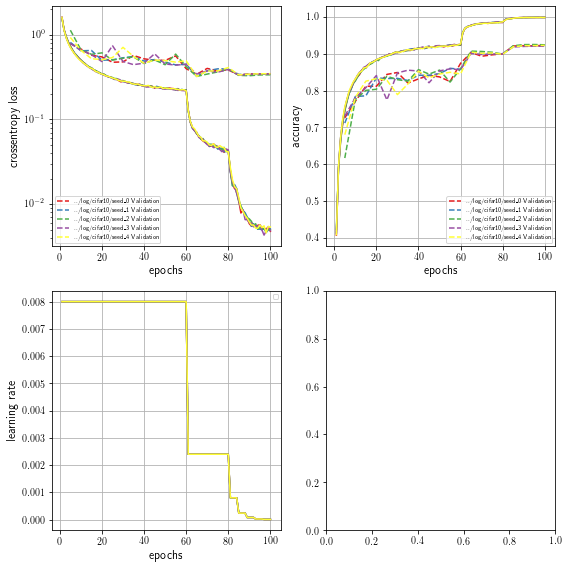

In [3]:
log_path = '../log/cifar10'
runids = [os.path.join(log_path, name) for name in sorted(os.listdir(log_path)) if os.path.isdir(os.path.join(log_path, name))]
fig = plot_training_history(runids, [])

# Compute performance metrics

In [4]:
def get_performance_metrics(runids):
    n_class_metric_names = []
    class_metric_names = ['acc']
    single_exp_metrics, combined_exp_metrics = [], []
    single_exp_df, combined_exp_df = [], []

    #single model performances
    for runid in runids:
        seed_paths = [os.path.join(runid, path) for path in os.listdir(runid) if os.path.isdir(os.path.join(runid, path))]
        single_exp_dict, combined_exp_dict = ev.get_classification_metrics_from_multiple_sources(
            seed_paths, 
            runid,
            class_metric_names=class_metric_names,
            n_class_metric_names=n_class_metric_names,
            b_ensemble=False,
            b_average_metrics=True, 
            label_of_positive=None, 
            labels=[],
        )
        single_exp_metrics.append(single_exp_dict)
        combined_exp_metrics.append(combined_exp_dict)
        single_exp_df.append(ev.get_single_exp_df(single_exp_dict, n_class_metric_names))
        combined_exp_df.append(ev.get_combined_exp_df(combined_exp_dict, n_class_metric_names))

    single_exp_df = pd.concat(single_exp_df)
    combined_exp_df = pd.concat(combined_exp_df)
    
    return single_exp_df, combined_exp_df, single_exp_metrics, combined_exp_metrics

def evaluate(path: str, save: bool = True, verbose: bool = False):
    single_exp_df, combined_exp_df, single_exp_metrics, combined_exp_metrics = get_performance_metrics([path])
    if save:
        prefix = path.replace("../","").replace("/","_")
        single_exp_df.to_csv(os.path.join(RESULTPATH, prefix + "_single_experiment_results.csv"))
        combined_exp_df.to_csv(os.path.join(RESULTPATH, prefix + "_combined_experiment_results.csv"))
    if verbose:
        print("single experiment performance")
        print(single_exp_df)
        print("combined experiment performance")
        print(combined_exp_df)


In [5]:
evaluate('../log/cifar10', verbose=True)

single experiment performance
                                          id     acc label_of_positive
../log/cifar10/seed_2  ../log/cifar10/seed_2  0.9245              None
../log/cifar10/seed_0  ../log/cifar10/seed_0  0.9233              None
../log/cifar10/seed_1  ../log/cifar10/seed_1  0.9225              None
../log/cifar10/seed_4  ../log/cifar10/seed_4  0.9229              None
../log/cifar10/seed_3  ../log/cifar10/seed_3  0.9205              None
combined experiment performance
                            id  acc_mean   acc_std
../log/cifar10  ../log/cifar10   0.92274  0.001305
